In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Iteration 1: 4 misclassified points
Iteration 2: 2 misclassified points
Iteration 3: 0 misclassified points
Converged: No misclassifications in this iteration.
Time required for training: 0.0067 seconds
Perceptron classification accuracy on training set: 1.0


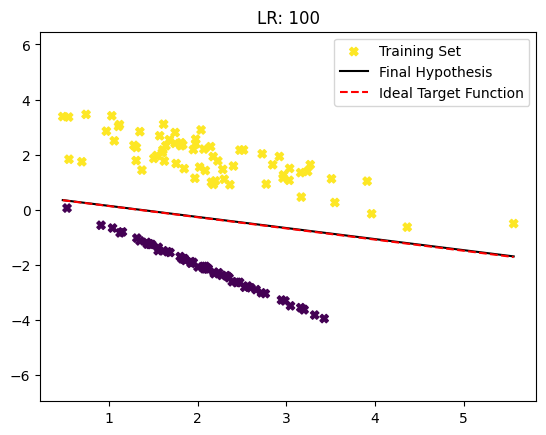

Perceptron misclassification error on test set: 20


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import time

class CP:
    def __init__(self, lr=1, max_iters=500):
        self.lr = lr
        self.max_iters = max_iters
        self.activation_func = self._step_function
        self.w = None
        self.b = None

    def train(self, feats, labels):
        n, m = feats.shape
        self.w = np.zeros(m)
        self.b = 0

        bin_labels = np.where(labels > 0, 1, 0)

        start_time = time.time()

        for it in range(self.max_iters):
            mis_count = 0

            for feat, label in zip(feats, bin_labels):
                out = np.dot(feat, self.w) + self.b
                pred_label = self.activation_func(out)

                update = self.lr * (label - pred_label)

                self.w += update * feat
                self.b += update

                mis_count += int(update != 0)

            print(f"Iteration {it + 1}: {mis_count} misclassified points")

            if mis_count == 0:
                print("Converged: No misclassifications in this iteration.")
                break

        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Time required for training: {elapsed_time:.4f} seconds")

    def predict(self, feats):
        out = np.dot(feats, self.w) + self.b
        pred_labels = self.activation_func(out)
        return pred_labels

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)

def calc_error(true_labels, preds_train):
    return np.sum(true_labels != preds_train)  # Count misclassifications

def train_and_plot(feats_train, labels_train, feats_test, labels_test, lr):
    perceptron = CP(lr=lr, max_iters=1000)
    perceptron.train(feats_train, labels_train)
    preds_train = perceptron.predict(feats_train)
    error_train = calc_error(labels_train, preds_train)

    print("Perceptron classification accuracy on training set:", calc_accuracy(labels_train, preds_train))

    plt.scatter(feats_train[:, 0], feats_train[:, 1], marker="X", c=labels_train, label="Training Set")

    x1, x2 = np.amin(feats_train[:, 0]), np.amax(feats_train[:, 0])
    y1, y2 = (-perceptron.w[0] * x1 - perceptron.b) / perceptron.w[1], (-perceptron.w[0] * x2 - perceptron.b) / perceptron.w[1]
    plt.plot([x1, x2], [y1, y2], "k", label="Final Hypothesis")

    ideal_w = np.array([-2, 1.5, 3.7])  # Assuming a simple y = mx + b for demonstration
    ideal_y1, ideal_y2 = (-ideal_w[1] * x1 - ideal_w[0]) / ideal_w[2], (-ideal_w[1] * x2 - ideal_w[0]) / ideal_w[2]
    plt.plot([x1, x2], [ideal_y1, ideal_y2], "r--", label="Ideal Target Function")

    plt.ylim([np.amin(feats_train[:, 1]) - 3, np.amax(feats_train[:, 1]) + 3])
    plt.legend()
    plt.title(f"LR: {lr}")
    plt.show()

    preds_test = perceptron.predict(feats_test)
    error_test = calc_error(labels_test, preds_test)

    print("Perceptron misclassification error on test set:", error_test)

if __name__ == "__main__":
    def calc_accuracy(true_labels, preds):
        return np.sum(true_labels == preds) / len(true_labels)
    
    feats, labels = make_classification(n_samples=2120, n_features=2, n_informative=2, n_redundant=0,
                                        n_clusters_per_class=1, class_sep=2.0, random_state=2)

    feats_train, feats_test, labels_train, labels_test = train_test_split(
        feats, labels, test_size=0.94, train_size=0.06, random_state=22
    )

    train_and_plot(feats_train, labels_train, feats_test, labels_test, lr=100)


Iteration 1: 4 misclassified points
Iteration 2: 2 misclassified points
Iteration 3: 0 misclassified points
Converged: No misclassifications in this iteration.
Time required for training: 0.0069 seconds
Perceptron classification accuracy on training set: 1.0


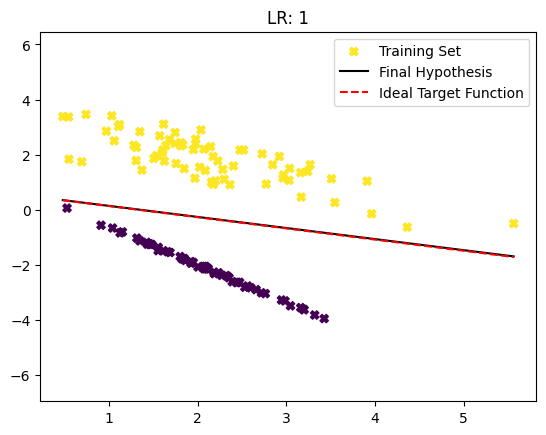

Perceptron misclassification error on test set: 20


In [3]:
train_and_plot(feats_train, labels_train, feats_test, labels_test, lr=1)

Iteration 1: 4 misclassified points
Iteration 2: 2 misclassified points
Iteration 3: 0 misclassified points
Converged: No misclassifications in this iteration.
Time required for training: 0.0148 seconds
Perceptron classification accuracy on training set: 1.0


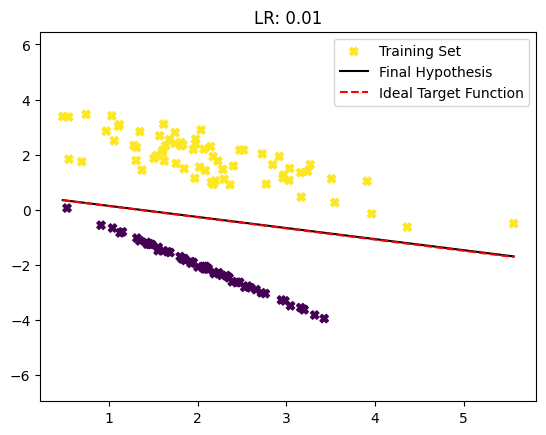

Perceptron misclassification error on test set: 20


In [4]:
train_and_plot(feats_train, labels_train, feats_test, labels_test, lr=0.01)

Iteration 1: 4 misclassified points
Iteration 2: 2 misclassified points
Iteration 3: 0 misclassified points
Converged: No misclassifications in this iteration.
Time required for training: 0.0158 seconds
Perceptron classification accuracy on training set: 1.0


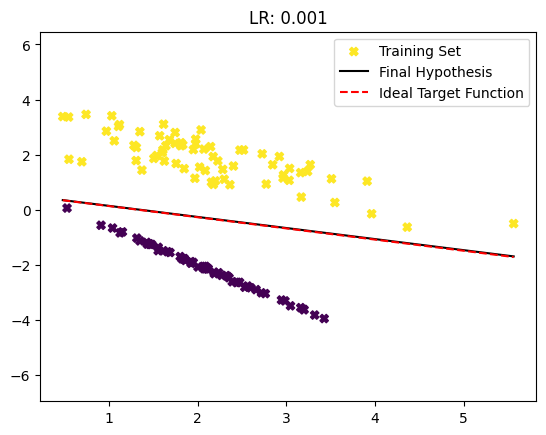

Perceptron misclassification error on test set: 20


In [5]:
train_and_plot(feats_train, labels_train, feats_test, labels_test, lr=0.001)

Iteration 1: 69 misclassified points, Accuracy: 0.047244094488188976
Iteration 2: 70 misclassified points, Accuracy: 0.047244094488188976
Iteration 3: 70 misclassified points, Accuracy: 0.047244094488188976
Iteration 4: 70 misclassified points, Accuracy: 0.047244094488188976
Iteration 5: 71 misclassified points, Accuracy: 0.49606299212598426
Iteration 6: 69 misclassified points, Accuracy: 0.047244094488188976
Iteration 7: 70 misclassified points, Accuracy: 0.047244094488188976
Iteration 8: 70 misclassified points, Accuracy: 0.047244094488188976
Iteration 9: 70 misclassified points, Accuracy: 0.047244094488188976
Iteration 10: 70 misclassified points, Accuracy: 0.047244094488188976
Iteration 11: 70 misclassified points, Accuracy: 0.047244094488188976
Iteration 12: 70 misclassified points, Accuracy: 0.047244094488188976
Iteration 13: 70 misclassified points, Accuracy: 0.047244094488188976
Iteration 14: 70 misclassified points, Accuracy: 0.047244094488188976
Iteration 15: 70 misclassified

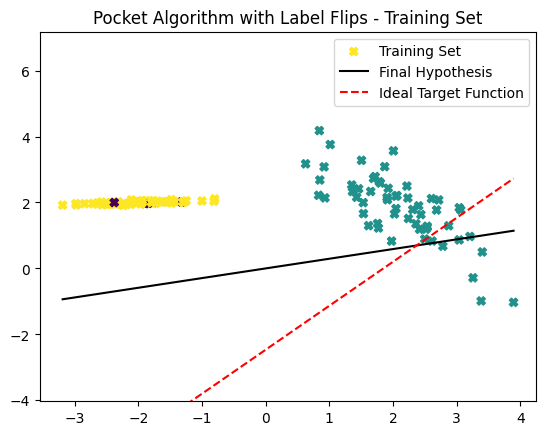

Pocket Perceptron classification accuracy on test set: 0.05218263923733066


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

class PocketPerceptron:
    def __init__(self, learning_rate=0.01, max_iterations=500):
        self.lr = learning_rate
        self.max_iters = max_iterations
        self.weights = None
        self.best_weights = None
        self.best_accuracy = 0

    def train(self, features, labels):
        num_samples, num_features = features.shape
        self.weights = np.zeros(num_features)
        self.best_weights = np.zeros(num_features)

        for iteration in range(self.max_iters):
            misclassified_count = 0

            for feature, label in zip(features, labels):
                linear_output = np.dot(feature, self.weights)
                predicted_label = np.sign(linear_output)

                if predicted_label != label:
                    self.weights += self.lr * label * feature
                    misclassified_count += 1

            accuracy = self.evaluate(features, labels)
            
            # Update the best weights if the current model is better
            if accuracy > self.best_accuracy:
                self.best_weights = np.copy(self.weights)
                self.best_accuracy = accuracy

            print(f"Iteration {iteration + 1}: {misclassified_count} misclassified points, Accuracy: {accuracy}")

            if misclassified_count == 0:
                print("Converged: No misclassifications in this iteration.")
                break

    def evaluate(self, features, labels):
        predictions = np.sign(np.dot(features, self.weights))
        accuracy = np.sum(labels == predictions) / len(labels)
        return accuracy

    def predict(self, features):
        linear_output = np.dot(features, self.best_weights)
        predicted_labels = np.sign(linear_output)
        return predicted_labels


def flip_labels(features, labels, flip_fraction=0.1, random_seed=None):
    np.random.seed(random_seed)
    num_flips = int(len(labels) * flip_fraction)
    flip_indices = np.random.choice(len(labels), num_flips, replace=False)
    labels[flip_indices] *= -1  # Flip the labels randomly
    return features, labels


# Generate linearly separable datasets
features, labels = make_classification(n_samples=2120, n_features=2, n_informative=2, n_redundant=0,
                                       n_clusters_per_class=1, class_sep=2.0, random_state=22)

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.94, train_size=0.06, random_state=50
)

# Flip labels randomly in both training and testing sets
features_train, labels_train = flip_labels(features_train, labels_train, flip_fraction=0.1, random_seed=42)
features_test, labels_test = flip_labels(features_test, labels_test, flip_fraction=0.1, random_seed=42)

# Train and evaluate with the Pocket Algorithm
pocket_perceptron = PocketPerceptron(learning_rate=0.01, max_iterations=1000)
pocket_perceptron.train(features_train, labels_train)

# Display the training set, final hypothesis, and ideal target function
plt.scatter(features_train[:, 0], features_train[:, 1], marker="X", c=labels_train, label="Training Set")
x_1, x_2 = np.amin(features_train[:, 0]), np.amax(features_train[:, 0])
y_1, y_2 = (-pocket_perceptron.best_weights[0] * x_1) / pocket_perceptron.best_weights[1], (-pocket_perceptron.best_weights[0] * x_2) / pocket_perceptron.best_weights[1]
plt.plot([x_1, x_2], [y_1, y_2], "k", label="Final Hypothesis")

# Plot the ideal target function y = 4/3x - 37/15
ideal_x = np.linspace(x_1, x_2, 100)
ideal_y = (4/3) * ideal_x - 37/15
plt.plot(ideal_x, ideal_y, "r--", label="Ideal Target Function")

plt.ylim([np.amin(features_train[:, 1]) - 3, np.amax(features_train[:, 1]) + 3])
plt.legend()
plt.title("Pocket Algorithm with Label Flips - Training Set")
plt.show()

# Evaluate on the test set
predictions_test = pocket_perceptron.predict(features_test)
accuracy_test = pocket_perceptron.evaluate(features_test, labels_test)
print("Pocket Perceptron classification accuracy on test set:", accuracy_test)
